<a href="https://colab.research.google.com/github/m0rgAn115/Bin_Package_Problem_Algoritmo_Genetico/blob/main/ProyectoFinalAlgoritmosBioinspirados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
weights = np.array([3,4,5,4,1,2,4])
max_capacity = 8

# Funcion para generar poblacion (Propuesta 1) [**DESCARTADA**]

Esta propuesta de generacion de poblacion se basara en tomar pesos aleatorios del arreglo y comenzar a llenar arreglos tomando en cuenta el peso maximo por contenedor.

Para la generacion de la poblacion se utilizaron las siguientes funciones:
* `calculate_single_len`, esta funcion llena un contenedor con los valores ordenados de manera ascendente, haciendo que cuando se llene la cantidad de pesos resulten en el maximo posible de objetos que caben en un contenedor.

 **Ejemplo**:  Se tiene el arreglo de pesos ya ordenados `[1,2,3,4,4,4,5]`, y la capacidad maxima de un contenedor es 8, entonces si comenzamos a llenar un contenedor con los valores del arreglo ordenado de menor a mayor nos quedaria: `[1,2,3]` -> `6`, `6` representa el peso del contenedor, ya que el valor que sigue es 4 y al añadirlo se excede del limite. Por lo tanto al obtener la longitud del arreglos nos da `3`, el cual representa el maximo de valores que puede tener un contenedor, ya que cualquier posible combinacion de los pesos siempre va a dar un numero entre `1` y `3`.

* `get_max_bins`, en esta funcion se hace algo similar a la anterior con la diferencia de que se busca obtener el maximo posible de contenedores (bins), esto se hace ordenando el arreglo de mayor a menor, despues comenzando a llenar contenedores. De esta manera obtendremos la combinacion maxima posible de contenedores.

 **Ejemplo:** Teniendo nuestros pesos ordenados de manera descendente: `[5,4,4,4,3,2,1]`, comenzamos a llenar contenedores de tal forma que el peso por contenedor no supere el limite, entonces nos quedan asi: `[5], [4,4], [4,3], [3,2,1]`. Una vez que hemos ocupado todos los pesos para llenar contenedores de manera descendente obtendremos la cantidad maxima posible de contenedores con base a nuestros pesos y limite establecido. Por lo tanto el maximo de contenedores posibles para este ejemplo es: `4

In [ ]:
import numpy as np
import random

# Función para calcular el tamaño máximo de un individuo
def calculate_single_len(weights, max_capacity):
    sorted_w = np.sort(weights)

    # Paso 2: Calcular la suma acumulativa
    acc_w = np.cumsum(sorted_w)

    # Paso 3: Filtrar los valores cuya suma acumulativa sea menor al límite
    valid_vals = sorted_w[acc_w <= max_capacity]

    return len(valid_vals)

# Funcion para obtener el maximo de bins (contenedores) que puede haber.
def get_max_bins(weights, max_capacity):
    # Ordenar los pesos de mayor a menor
    sorted_weights = np.sort(weights)[::-1]
    print("sorted: ", sorted_weights)

    bins = 0
    sum = 0
    for i in sorted_weights:
      new_val = sum + i
      if new_val > max_capacity:
        bins+=1
        sum = 0

      sum += i

    if sum>0:
      bins += 1

    return bins

# Función para crear un individuo "single"
def create_single(weights, max_capacity, max_len, max_bins):
    single = []  # Empezamos con una lista para manejar las filas dinámicamente
    w = np.copy(weights)

    while len(w) > 0:
        row = []  # Una fila para almacenar valores
        while len(w) > 0:
            indx = random.randint(0, len(w) - 1)
            val = w[indx]
            row_sum = np.sum(row)
            if row_sum + val > max_capacity:
                break
            else:
                w = np.delete(w, indx)
                row.append(val)

        # Rellenar la fila con ceros hasta max_len
        row = np.pad(row, (0, max_len - len(row)), mode='constant', constant_values=0)
        single.append(row)  # Agregar la fila a la lista principal

    # Obtener las filas restantes para que los arreglos sean de tamaño max_len * max_bins
    rest = max_bins - len(single)
    for i in range(rest):
      row = np.zeros(max_len, dtype=int)
      single.append(row)

    # Convertir la lista de filas a un arreglo bidimensional
    single = np.array(single)
    return single

### Prueba de generacion de poblacion utilizando las funciones propuestas:

In [ ]:
#Prueba

single_max_len = calculate_single_len(weights, max_capacity)

max_bins = get_max_bins(weights, max_capacity)

print(create_single(weights, max_capacity,single_max_len, max_bins))


sorted:  [5 4 4 4 3 2 1]
[[5 3 0]
 [1 4 0]
 [4 4 0]
 [2 0 0]]


# Funcion Objetivo

In [ ]:
def calculate_fitness(single, max_capacity):
  fitness = 0
  for i in range(len(single)):
    sum = np.sum(single[i])
    if sum!= 0:
      fitness += max_capacity-sum

  return fitness



In [ ]:
weights = np.array([3,4,5,4,1,2,4,5,3,6,7,8,3,2,4,5,7,8,4])
max_capacity = 8
max_bins = get_max_bins(weights, max_capacity)
single_max_len = calculate_single_len(weights, max_capacity)

print("max bins: ", max_bins)

sorted:  [8 8 7 7 6 5 5 5 4 4 4 4 4 3 3 3 2 2 1]
max bins:  13


In [ ]:
ind = create_single(weights, max_capacity,single_max_len, max_bins)
fitness = calculate_fitness(ind, max_capacity)

print(f"Individuo \n {ind}\nShape: {ind.shape}\nFitness: {fitness}")

Individuo 
 [[4 0 0 0]
 [5 0 0 0]
 [4 4 0 0]
 [3 0 0 0]
 [3 2 0 0]
 [7 0 0 0]
 [5 0 0 0]
 [7 0 0 0]
 [5 0 0 0]
 [4 0 0 0]
 [1 0 0 0]
 [2 6 0 0]
 [4 0 0 0]
 [8 0 0 0]
 [3 0 0 0]
 [8 0 0 0]]
Shape: (16, 4)
Fitness: 43


# Funcion para generar poblacion (Propuesta 2) [**PROPUESTA ACTUAL**]

Esta propuesta de generacion de poblacion sera un arreglo de tamaño `len(weights)`, donde cada indice representara el valor del peso, y el numero en el arreglo representara el contenedor al que pertenece.

Para la generacion de la poblacion se utilizaron las siguientes funciones:

In [ ]:
def get_max_bins_P2(weights, max_capacity):
  sum = np.sum(weights)
  max = sum/max_capacity
  return math.ceil(max)

def create_single_P2(weights, max_bins):
  ind = []
  for w in weights:
    indx = random.randint(0,max_bins-1)
    ind.append(indx)

  return np.array(ind)


## Funcion para calcular la aptitud

Al ser el inverso el objetivo es maximizar la aptitud.

En la funcion para calcular la aptitud, aun se tomara en cuenta los contenedores de peso extra para penalizarlos, haciendo que la aptitud baje mucho en caso de que haya contenedores que sobrepasan el limite. Esto con el fin de que cuando se crea la poblacion no se tomen estos contenedores como "buenos" antes de que se les aplique reparacion, manteniendo una mayor diversidad en la poblacion.

In [ ]:
def calculate_fitness_P2(ind, weights, max_capacity, alpha=0.7, beta = 2, gamma = 0.3):
    # Crear el diccionario inicial
    used_bins = {indx: 0 for indx in ind}

    # Actualizar los valores en el diccionario
    for indx, i in enumerate(ind):
        used_bins[i] += weights[indx]

    # Crear un nuevo diccionario basado en los valores actualizados
    used_bins_extra_weights = {key: value - max_capacity for key, value in used_bins.items() if value>max_capacity}

    used_bins_less_weights = {key: max_capacity - value for key, value in used_bins.items() if value<max_capacity}

    total_less_weight = sum(used_bins_less_weights.values())

    total_extra_weight = sum(used_bins_extra_weights.values())



    fitness = 1/(1 + alpha*len(used_bins) + beta*total_extra_weight + gamma*total_less_weight)

    # Imprimir los resultados
    # print("used_bins: ", used_bins)
    # print("used_bins_weights: ", used_bins_extra_weights)
    # print("used_bins: ", len(used_bins))
    # print("extra: ", total_extra_weight)
    # print("less: ", total_less_weight)
    # print("fitness: ", fitness)

    return fitness, len(used_bins), total_extra_weight, total_less_weight

## Creacion de clase

En este codigo se crea la clase y los metodos con los que se utilizara el algoritmo genetico.

In [ ]:
class AG_BPP_P1:
  def __init__(self, weights, max_capacity, cost_op = 1):
    self.weights = weights
    self.max_capacity = max_capacity
    self.cost_op = cost_op/max_capacity
    self.max_bins = get_max_bins_P2(weights, max_capacity)

  def create_ind(self):
    ind = create_single_P2(self.weights, self.max_bins)
    # print(f"Ind: \n{ind}  \nWeights: \n{self.weights}")
    return ind

  def get_fitness(self):
    ind = self.create_ind()
    used_bins, extra, fitness = calculate_fitness_P2(ind, self.weights, self.max_capacity, self.cost_op)
    # print("fitness: ", fitness)
    return used_bins, extra, fitness

  def get_fitness_ind(self,ind):
    fitness, used_bins, extra, less = calculate_fitness_P2(ind, self.weights, self.max_capacity, self.cost_op)
    # print("fitness: ", fitness)
    return fitness, used_bins, extra, less



## **Reparacion de individuo**
La reparacion conciste en asignar en otros contenedores las cargas que exceden del limite por contenedor.

La manera en la que la manejare es la siguiente:
Crearemos dos conjuntos uno con los contenedores que exceden de peso, y un conjunto con los contenedores que tienen espacio disponible, posteriormente seleccionaremos un contenedor del conjunto pesado de manera aleatoria.
Una vez que tengamos el contenedor seleccionado, obtendremos un objeto que tenga un peso medio (que no sea muy grande, ni muy pequeño).
Recorreremos el conjunto de contenedores con espacio libre para calcular cual contenedor se adapta mejor a nuestro peso, esto lo hacemos obteniendo el espacio que quedaria si metemos ese objeto, seleccionaremos cuyo espacio sea minimo despues de incorporar el objeto.
Despues se intercambia el peso entre los contenedores y el proceso se repite hasta que ya no haya contenedores con peso extra.
En caso de que no sea posible incorporar el peso en los contenedores existentes, se crea un nuevo contenedor.




### Funciones auxiliares

In [ ]:
# Funcion para imprimir contenedores
def splitBins(used_bins, max_capacity, show = False):

  # Crear un nuevo diccionario basado en los valores actualizados
  used_bins_extra_weights = {
    key: {"items": data["items"]}
    for key, data in used_bins.items()
    if sum(data["items"]) > max_capacity
  }

  used_bins_less_weights = {
    key: {"items": data["items"]}
    for key, data in used_bins.items()
    if sum(data["items"]) < max_capacity
  }

  used_bins_full_weights = {
    key: {"items": data["items"]}
    for key, data in used_bins.items()
    if sum(data["items"]) == max_capacity
  }

  if show:
    print("\n\nCantidad de contenedores: ", len(used_bins.keys()))
    print("\n---[Contenedores usados:]---")
    for clave, atributos in used_bins.items():
      print(f"Clave: {clave}, Valor: {sum(atributos['items'])}, Items: {atributos['items']}")

    print("\n---[Contenedores con peso exta:]---")
    for clave, atributos in used_bins_extra_weights.items():
      print(f"Contenedor: {clave}, Items: {atributos['items']}, Peso Extra: {sum(atributos['items'])- max_capacity},Peso Total: {sum(atributos['items'])}")

    print("\n---[Contenedores con peso faltante:]---")
    for clave, atributos in used_bins_less_weights.items():
      print(f"Contenedor: {clave}, Items: {atributos['items']}, Espacio Disponible: {max_capacity-sum(atributos['items'])}, Peso Total: {sum(atributos['items'])}")

    print("\n---[Contenedores con peso completo:]---")
    for clave, atributos in used_bins_full_weights.items():
      print(f"Contenedor: {clave}, Items: {atributos['items']}, Peso Total: {sum(atributos['items'])}")

  return used_bins_extra_weights, used_bins_less_weights, used_bins_full_weights

# Funcion para intercambiar items de contenedores que exceden el limite
# a contenedores con espacio disponible

def fill_bins(bins,max_capacity, max_bins, show = False):
  used_bins = bins.copy()

  # print("Len BINS: ", len(used_bins))


  while True:
    total_elementos = 0
    for clave, atributos in used_bins.items():
      total_elementos += len(atributos["items"])

    # print("Cantidad de pesos en total: ", total_elementos)

    used_bins_extra_weights, used_bins_less_weights, _ = splitBins(used_bins, max_capacity, show)

    if(len(used_bins_extra_weights) == 0):
      break

    # print("\n\nExtra Weight Containers: ", len(used_bins_extra_weights))
    # Seleccion aleatoria de contenedores con sobre carga
    overweight_selected_bin = random.choice(list(used_bins_extra_weights.keys()))
    # print("Selected Bin: ",overweight_selected_bin)

    # Obtenemos los items del contenedor
    overweight_selected_bin_items = used_bins_extra_weights[overweight_selected_bin]["items"]
    # print("Items Selected Bin: ", overweight_selected_bin_items)

    # Seleccionamos la carga media del contenedor:
    selected_index = np.abs(np.array(overweight_selected_bin_items) - max_capacity/2).argmin()
    selected_weight = overweight_selected_bin_items[selected_index]
    # print("Mean Weight Item:  ", selected_weight)
    # print("Mean Weight Index:  ", selected_index)

    # Luego intenta eliminar
    used_bins_extra_weights[overweight_selected_bin]["items"].pop(selected_index)

    # print("Contenido de la lista:", used_bins_extra_weights[overweight_selected_bin]["items"])

    modified = False # Nos sirve para saber si el peso pudo ser asignado
    # Recorremos los contenedores con espacio para validar que el item pueda ser asignado
    # Inicializa las variables para rastrear el mejor ajuste
    best_fit_key = None
    min_remaining_space = float('inf')  # Usamos un valor inicial muy grande

    # Iterar sobre los contenedores con espacio
    for clave, atributos in used_bins_less_weights.items():
        # Calcular el espacio restante si añadimos el peso
        remaining_space = max_capacity - (sum(atributos["items"]) + selected_weight)

        # Comprobar si el peso cabe y si deja menos espacio restante
        if selected_weight <= max_capacity - sum(atributos["items"]) and remaining_space < min_remaining_space:
            min_remaining_space = remaining_space
            best_fit_key = clave

    if best_fit_key == None:
      bins_numbers = list(used_bins.keys())

      if len(bins_numbers) < max_bins:
        total_bins = set(range(0, max_bins))
        bins_remaning = list(total_bins - set(bins_numbers))
        # print("bins remainig: ", bins_remaning)
        new_bin = random.choice(bins_remaning)
        used_bins.update({new_bin: {"items": [selected_weight]}})
      else:
        used_bins.update({len(used_bins): {"items": [selected_weight]}})
      # print("--SE CREO NUEVO CONTENEDOR: ",max_bins )
    else:
      used_bins[best_fit_key]["items"].append(selected_weight)
      # print("--SE USO CONTENEDOR EXISTENTE")



  return used_bins

# Funciones que convierten los diccionarios utilizados en fix_bins
# a la forma que tiene la poblacion

def format_bins(bins,weights):
  weights = list(weights)
  ind = [-1]*len(weights)

  # print("bins: ", bins)

  for clave, atributos in bins.items():
    for item in atributos["items"]:
      index = weights.index(item)
      ind[index] = int(clave)
      weights[index] = 0

  return ind



### Codigo de funcion de reparacion

In [ ]:

def fix_bins(ind, max_capacity, max_bins,weights):

  max_bins = max(ind) + 1
  # print("Max Bin: ",max_bins)
  # print("ORIGINAL: ",ind)

  # Crear el diccionario inicial con múltiples atributos
  used_bins = {indx: {"items": []} for indx in ind}


  # Actualizar los valores y arreglos en el diccionario
  for indx, i in enumerate(ind):
      used_bins[i]["items"].append(weights[indx])  # Agregar al arreglo

  # print("Cantidad de contenedores usados: ", len(used_bins))

  splitBins(used_bins, max_capacity, show=False)

  used_bins = fill_bins(used_bins, max_capacity, max_bins, False)

  splitBins(used_bins, max_capacity, show=False)

  ind = format_bins(used_bins, weights)

  return ind



### Pruebas

In [ ]:
random.seed()

weights = np.array([3,4,5,4,1,2,4,5,3,6,7,8,3,2,4,5,7,8,4])
# weights = np.array([3,4,5,4,1,2,4])
max_capacity = 8

AG = AG_BPP_P1(weights, max_capacity)

ind = AG.create_ind()

new_ind = fix_bins(ind, AG.max_capacity, AG.max_bins,AG.weights)
print(f"Inidividuo antes de reparacion: {ind} \nContenedores usados: {AG.get_fitness_ind(ind)[0]}\nExceso de peso total: {AG.get_fitness_ind(ind)[1]}\nFitness: {AG.get_fitness_ind(ind)[2]}")
print(f"\nInidividuo despues de reparacion: {new_ind} \nContenedores usados: {AG.get_fitness_ind(new_ind)[0]}\nExceso de peso total: {AG.get_fitness_ind(new_ind)[1]}\nFitness: {AG.get_fitness_ind(new_ind)[2]}")



Inidividuo antes de reparacion: [ 6 10  1  2  5  4  3 10  7 10  9  1  3  4  6  2  3  1  1] 
Contenedores usados: 0.014383315354189139
Exceso de peso total: 9
Fitness: 31

Inidividuo despues de reparacion: [6, 6, 2, 5, 5, 4, 4, 7, 2, 10, 3, 1, 7, 4, 0, 8, 9, 11, 0] 
Contenedores usados: 0.1724137931034483
Exceso de peso total: 12
Fitness: 0


### **Conclusiones y resultados de la reparacion**

Como podemos observar, aplicamos la mutacion y conversion de manera satisfactoria, y al comparar el fitness del individuo original y despues de ser reparado, la aptitud del individuo reparado es menor indicando que mejoro.

Una vez que logramos aplicar la reparacion podemos aplicarla despues de la mutacion para asegurarnos que los individuos sean mas aptos.

### Metodos de cruza

1. Cruza de 1 punto
2. Cruza de 2 puntos
3. Cruza uniforma

In [ ]:
def intercambiar(num_1, num_2):
  return num_2, num_1

def cruza_dos_punto(padre,madre):
  n = len(padre)
  indice_1 = random.randint(1,n-1)

  indice_2 = random.choice([i for i in range(1, n) if i != indice_1])

  if(indice_1 > indice_2 ):
    indice_1, indice_2 = intercambiar(indice_1, indice_2)

  padre = list(padre)
  madre = list(madre)

  hijo1 = padre[:indice_1] + madre[indice_1:indice_2] + padre[indice_2:]
  hijo2 = madre[:indice_1] + padre[indice_1:indice_2] + madre[indice_2:]
  # print(f"hijo1: {hijo1}")
  # print(f"hijo2: {hijo2}")

  return hijo1, hijo2



### Pruebas de Cruza

In [ ]:
print(f"Max Bins: {AG.max_bins}")

ind_1 = fix_bins(AG.create_ind(), AG.max_capacity, AG.max_bins,AG.weights)
ind_2 = fix_bins(AG.create_ind(), AG.max_capacity, AG.max_bins,AG.weights)

print(f"Inidividuo 1: {ind_1} \nContenedores usados: {AG.get_fitness_ind(ind_1)[1]}\nExceso de peso total: {AG.get_fitness_ind(ind_1)[2]}\nSobrante de peso total: {AG.get_fitness_ind(ind_1)[3]}\nFitness: {AG.get_fitness_ind(ind_1)[0]}")
print(f"\nInidividuo 2: {ind_2} \nContenedores usados: {AG.get_fitness_ind(ind_2)[1]}\nExceso de peso total: {AG.get_fitness_ind(ind_2)[2]}\nSobrante de peso total: {AG.get_fitness_ind(ind_2)[3]}\nFitness: {AG.get_fitness_ind(ind_2)[0]}")

print("\n----CRUZA----\n")

hijo_1, hijo_2 = cruza_dos_punto(ind_1, ind_2)

ind_1 = fix_bins(hijo_1, AG.max_capacity, AG.max_bins,AG.weights)
ind_2 = fix_bins(hijo_2, AG.max_capacity, AG.max_bins,AG.weights)

print(f"Inidividuo 1: {ind_1} \nContenedores usados: {AG.get_fitness_ind(ind_1)[1]}\nExceso de peso total: {AG.get_fitness_ind(ind_1)[2]}\nSobrante de peso total: {AG.get_fitness_ind(ind_1)[3]}\nFitness: {AG.get_fitness_ind(ind_1)[0]}")
print(f"\nInidividuo 2: {ind_2} \nContenedores usados: {AG.get_fitness_ind(ind_2)[1]}\nExceso de peso total: {AG.get_fitness_ind(ind_2)[2]}\nSobrante de peso total: {AG.get_fitness_ind(ind_2)[3]}\nFitness: {AG.get_fitness_ind(ind_2)[0]}")

print("weights: ", AG.weights)



Max Bins: 11
Inidividuo 1: [7, 6, 7, 8, 2, 5, 8, 3, 3, 5, 2, 0, 1, 6, 4, 1, 10, 9, 4] 
Contenedores usados: 11
Exceso de peso total: 0
Sobrante de peso total: 3
Fitness: 0.3053435114503817

Inidividuo 2: [5, 3, 1, 11, 3, 2, 11, 7, 5, 2, 10, 4, 8, 8, 12, 9, 6, 0, 12] 
Contenedores usados: 13
Exceso de peso total: 0
Sobrante de peso total: 19
Fitness: 0.12012012012012013

----CRUZA----

Inidividuo 1: [5, 6, 7, 8, 2, 6, 11, 1, 5, 3, 2, 0, 1, 5, 4, 12, 10, 9, 4] 
Contenedores usados: 13
Exceso de peso total: 0
Sobrante de peso total: 19
Fitness: 0.12012012012012013

Inidividuo 2: [3, 11, 1, 11, 3, 2, 2, 9, 1, 5, 10, 4, 8, 8, 12, 7, 6, 0, 12] 
Contenedores usados: 13
Exceso de peso total: 0
Sobrante de peso total: 19
Fitness: 0.12012012012012013
weights:  [3 4 5 4 1 2 4 5 3 6 7 8 3 2 4 5 7 8 4]


In [ ]:
arr = [0, 5, 1, 5, 1, 0, 2, 10, 0, 3, 8, 10, 3, 7, 3, 7, 6, 4, 11]
ind_1 = fix_bins(arr, AG.max_capacity, 12,AG.weights)


In [ ]:
def torneo(poblacion, ag, k=3):
    """
    Selección por torneo con k ajustable según el tamaño de la población.
    """
    # Ajustamos k si es mayor que el tamaño de la población
    k = min(k, len(poblacion))
    if k == 0:
        return None, poblacion

    # Seleccionamos k participantes aleatorios
    indices = np.random.choice(len(poblacion), size=k, replace=False)
    participantes = [poblacion[i] for i in indices]

    # Encontramos el mejor (menor aptitud)
    ganador = max(participantes, key=lambda x: ag.get_fitness_ind(x)[0])

    # Removemos solo la primera ocurrencia del ganador de la población
    for i, individuo in enumerate(poblacion):
        if np.array_equal(individuo, ganador):
            del poblacion[i]
            break

    return ganador, poblacion

In [ ]:
def cruza(padre, madre, probabilidad_cruza):
  hijo1 = padre.copy()
  hijo2 = madre.copy()

  for i in range(len(padre)):
    fila_h1 = hijo1[i]
    fila_h2 = hijo2[i]
    valor = np.random.rand()
    if valor <= probabilidad_cruza:
      hijo1[i] = madre[i]
      hijo2[i] = padre[i]

  return hijo1, hijo2

### Mutacion

Se manejara una mutación suave donde se intercambiaran 2 valores aleatorios

In [ ]:
def mutacion_suave(ind):
  indice_1 = random.randint(0, len(ind)-1)

  indice_2 = indice_1
  while indice_2 == indice_1:
    indice_2 = random.randint(0, len(ind)-1)

  val1 = ind[indice_1]
  val2 = ind[indice_2]

  ind[indice_1] = val2
  ind[indice_2] = val1

  return ind

### Funciones auxiliares


In [ ]:
def crear_poblacion(n_individuos, pesos, max_contenedores):
  poblacion = []
  for i in range(n_individuos):
    poblacion.append(create_single_P2(pesos, max_contenedores))

  return poblacion

def hacer_cruza(poblacion,f_cruza, ag):
  n = math.ceil(len(poblacion)*f_cruza)
  seleccionados = random.sample(poblacion, n)
  hijos = []

  while(len(seleccionados)>3):
    padre, seleccionados = torneo(seleccionados, ag)
    madre, seleccionados = torneo(seleccionados, ag)
    hijos.extend(cruza_dos_punto(padre, madre))

  return hijos

def hacer_mutacion(poblacion, f_mutacion):
  nuevos_individuos = []
  for individuo in poblacion:
    if random.uniform(0,1) <= f_mutacion:
      nuevos_individuos.append(mutacion_suave(individuo))
    else:
      nuevos_individuos.append(individuo)

  return nuevos_individuos

def hacer_reparacion(poblacion, max_capacity, max_bins, weights):
  individuos_reparados = []
  for individuo in poblacion:
    reparado = fix_bins(individuo, max_capacity, max_bins,weights)
    individuos_reparados.append(reparado)

  return individuos_reparados

# Algoritmo Genetico

In [ ]:
class AG_BPP:
  def __init__(self, weights, max_capacity, alpha=0.7, beta = 2, gamma = 0.3 ):
    """
      alpha: valor para determinar que tanto afecta en la aptitud la cantidad de contenedores
      beta: valor para determinar que tanto afecta en la aptitud el peso faltante a la capacidad total de los contenedores
      gamma: valor para determinar que tanto afecta en la aptitud el peso que supera la capacidad total de los contenedores
    """
    self.weights = weights
    self.max_capacity = max_capacity
    self.max_bins = get_max_bins_P2(weights, max_capacity)
    self.alpha = alpha
    self.beta = beta
    self.gamma = gamma

  def run(self, n_poblacion, n_generaciones, f_cruza, f_mutacion, show = True):
    """
      n_poblacion: tamaño de la poblacion

      f_cruza: porcentaje de cruza
      f_mutacion: porcentaje de mutacion
    """

    poblacion = crear_poblacion(n_poblacion,self.weights, self.max_bins)
    datos_algoritmo = []

    for i in range(n_generaciones):
      # Obtenemos hijos
      hijos = hacer_cruza(poblacion, f_cruza, self)

      # Aplicamos mutacion a hijos
      hijos_mutados = hacer_mutacion(hijos, f_mutacion)

      # Aplicamos reparacion a los hijos
      hijos_reparados = hacer_reparacion(hijos_mutados, self.max_capacity, self.max_bins, self.weights)

      # Juntamos a todos los individuos
      poblacion_completa = poblacion + hijos

      # Aplicamos elitismo para quedarnos con los mejores
      sobrevivientes = sorted(poblacion_completa, key=lambda individuo: self.get_fitness_ind(individuo)[0], reverse=True)

      poblacion = sobrevivientes[0:n_poblacion]

      datos_algoritmo.append({
          "mejor_aptitud":   self.get_fitness_ind(sobrevivientes[0])[0],
          "mejor_individuo":   sobrevivientes[0],
          "contenedores_usados":   self.get_fitness_ind(sobrevivientes[0])[1],
          "exceso_peso":   self.get_fitness_ind(sobrevivientes[0])[2],
          "sobrante_peso":  self.get_fitness_ind(sobrevivientes[0])[3],
      })

      if show:
        print(f"\n\nGeneracion [{i}] \n ")
        print(f"Inidividuo: {sobrevivientes[0]} \nContenedores usados: {self.get_fitness_ind(sobrevivientes[0])[1]}\nExceso de peso total: {self.get_fitness_ind(sobrevivientes[0])[2]}\nSobrante de peso total: {self.get_fitness_ind(sobrevivientes[0])[3]}\nFitness: {self.get_fitness_ind(sobrevivientes[0])[0]}")

    return datos_algoritmo

  def create_ind(self):
    ind = create_single_P2(self.weights, self.max_bins)
    # print(f"Ind: \n{ind}  \nWeights: \n{self.weights}")
    return ind

  def get_fitness(self):
    ind = self.create_ind()
    used_bins, extra, fitness = calculate_fitness_P2(ind, self.weights, self.max_capacity, self.cost_op)
    # print("fitness: ", fitness)
    return used_bins, extra, fitness

  def get_fitness_ind(self,ind):
    fitness, used_bins, extra, less = calculate_fitness_P2(ind, self.weights, self.max_capacity, self.alpha, self.beta, self.gamma)
    # print("fitness: ", fitness)
    return fitness, used_bins, extra, less



In [ ]:
AG = AG_BPP(weights, max_capacity, alpha=0.8, beta = 20, gamma=0.2)
resultados_algoritmo = AG.run(50, 200, 0.6, 0.5)



Generacion [0] 
 
Inidividuo: [ 0  7  3  1  3  0  7  8  9  3  8  4  7  3 10  1  9  2  5] 
Contenedores usados: 10
Exceso de peso total: 16
Sobrante de peso total: 11
Fitness: 0.0030193236714975845


Generacion [1] 
 
Inidividuo: [7, 9, 2, 5, 1, 8, 6, 9, 1, 6, 3, 5, 4, 3, 1, 0, 7, 8, 4] 
Contenedores usados: 10
Exceso de peso total: 12
Sobrante de peso total: 7
Fitness: 0.003993610223642172


Generacion [2] 
 
Inidividuo: [7, 9, 2, 5, 1, 8, 6, 9, 1, 6, 3, 5, 4, 3, 1, 0, 7, 8, 4] 
Contenedores usados: 10
Exceso de peso total: 12
Sobrante de peso total: 7
Fitness: 0.003993610223642172


Generacion [3] 
 
Inidividuo: [7, 9, 2, 5, 1, 8, 6, 9, 1, 6, 3, 5, 4, 3, 1, 0, 7, 8, 4] 
Contenedores usados: 10
Exceso de peso total: 12
Sobrante de peso total: 7
Fitness: 0.003993610223642172


Generacion [4] 
 
Inidividuo: [7, 9, 2, 5, 1, 8, 6, 9, 1, 6, 3, 5, 4, 3, 1, 0, 7, 8, 4] 
Contenedores usados: 10
Exceso de peso total: 12
Sobrante de peso total: 7
Fitness: 0.003993610223642172


Generacion [5] 

In [ ]:
print(resultados_algoritmo)

[{'mejor_aptitud': 0.0030193236714975845, 'mejor_individuo': array([ 0,  7,  3,  1,  3,  0,  7,  8,  9,  3,  8,  4,  7,  3, 10,  1,  9,
        2,  5]), 'contenedores_usados': 10, 'exceso_peso': 16, 'sobrante_peso': 11}, {'mejor_aptitud': 0.003993610223642172, 'mejor_individuo': [7, 9, 2, 5, 1, 8, 6, 9, 1, 6, 3, 5, 4, 3, 1, 0, 7, 8, 4], 'contenedores_usados': 10, 'exceso_peso': 12, 'sobrante_peso': 7}, {'mejor_aptitud': 0.003993610223642172, 'mejor_individuo': [7, 9, 2, 5, 1, 8, 6, 9, 1, 6, 3, 5, 4, 3, 1, 0, 7, 8, 4], 'contenedores_usados': 10, 'exceso_peso': 12, 'sobrante_peso': 7}, {'mejor_aptitud': 0.003993610223642172, 'mejor_individuo': [7, 9, 2, 5, 1, 8, 6, 9, 1, 6, 3, 5, 4, 3, 1, 0, 7, 8, 4], 'contenedores_usados': 10, 'exceso_peso': 12, 'sobrante_peso': 7}, {'mejor_aptitud': 0.003993610223642172, 'mejor_individuo': [7, 9, 2, 5, 1, 8, 6, 9, 1, 6, 3, 5, 4, 3, 1, 0, 7, 8, 4], 'contenedores_usados': 10, 'exceso_peso': 12, 'sobrante_peso': 7}, {'mejor_aptitud': 0.005813953488372093,

# Prueba del algoritmo con con valores

Probaremos el algoritmo con los siguientes pesos:
`pesos = [7, 5, 6, 4, 8, 7, 3, 2, 9, 5, 8, 4, 3, 6, 7, 5]`
 Y capacidad maxima de 15.

La solucion optima es: `contenedores = [
    [7, 8],   
    [6, 9],       
    [5, 8],
    [7, 6],
    [5, 5, 4],
    [4, 3, 3, 2]
]`

Es decir 6 contenedores.

In [ ]:
pesos = [7, 5, 6, 4, 8, 7, 3, 2, 9, 5, 8, 4, 3, 6, 7, 5]
capacidad = 15

AG = AG_BPP(pesos, capacidad, alpha=0.8, beta = 20, gamma=0.2)
resultados_algoritmo = AG.run(50, 200, 0.6, 0.5)



Generacion [0] 
 
Inidividuo: [2, 4, 1, 3, 0, 2, 5, 4, 5, 2, 3, 4, 1, 1, 5, 0] 
Contenedores usados: 6
Exceso de peso total: 8
Sobrante de peso total: 9
Fitness: 0.005966587112171837


Generacion [1] 
 
Inidividuo: [2, 4, 1, 3, 0, 2, 5, 4, 5, 2, 3, 4, 1, 1, 5, 0] 
Contenedores usados: 6
Exceso de peso total: 8
Sobrante de peso total: 9
Fitness: 0.005966587112171837


Generacion [2] 
 
Inidividuo: [1, 4, 3, 3, 0, 2, 5, 4, 5, 2, 1, 5, 5, 3, 4, 2] 
Contenedores usados: 6
Exceso de peso total: 7
Sobrante de peso total: 8
Fitness: 0.006784260515603799


Generacion [3] 
 
Inidividuo: [4, 1, 5, 4, 0, 2, 5, 3, 5, 2, 3, 4, 1, 2, 1, 0] 
Contenedores usados: 6
Exceso de peso total: 6
Sobrante de peso total: 7
Fitness: 0.007861635220125786


Generacion [4] 
 
Inidividuo: [0, 3, 0, 3, 2, 1, 0, 4, 3, 4, 5, 5, 1, 4, 2, 1] 
Contenedores usados: 6
Exceso de peso total: 4
Sobrante de peso total: 5
Fitness: 0.01152073732718894


Generacion [5] 
 
Inidividuo: [0, 3, 0, 3, 2, 1, 0, 4, 3, 4, 5, 5, 1, 4, 2

### Conclusion de la prueba

El algoritmo encontro la misma respuesta.

### Prueba dificil

Ahora probaremos con pesos más dificiles, este problema usando un metodo heuristico **First Fit Decreasing (FFD)**, el cual dio como resultado 5 usando los siguientes datos:

`pesos = [11, 9, 8, 8, 7, 7, 6, 5, 5, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1]`

`capacidad = 20`


In [ ]:
pesos = [11, 9, 8, 8, 7, 7, 6, 5, 5, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1]
capacidad = 20
AG = AG_BPP(pesos, capacidad, alpha=0.8, beta = 20, gamma=0.2)
resultados_algoritmo = AG.run(20, 100, 0.6, 0.5)



Generacion [0] 
 
Inidividuo: [1, 3, 4, 2, 3, 4, 1, 4, 0, 3, 0, 0, 1, 0, 0, 2, 0, 4, 3, 1] 
Contenedores usados: 5
Exceso de peso total: 3
Sobrante de peso total: 11
Fitness: 0.01488095238095238


Generacion [1] 
 
Inidividuo: [1, 3, 4, 2, 3, 4, 1, 4, 0, 3, 0, 0, 1, 0, 0, 2, 0, 4, 3, 1] 
Contenedores usados: 5
Exceso de peso total: 3
Sobrante de peso total: 11
Fitness: 0.01488095238095238


Generacion [2] 
 
Inidividuo: [1, 3, 4, 2, 3, 4, 1, 4, 0, 3, 0, 0, 1, 0, 0, 2, 0, 4, 3, 1] 
Contenedores usados: 5
Exceso de peso total: 3
Sobrante de peso total: 11
Fitness: 0.01488095238095238


Generacion [3] 
 
Inidividuo: [1, 3, 4, 2, 3, 4, 1, 4, 0, 3, 0, 0, 1, 0, 0, 2, 0, 4, 3, 1] 
Contenedores usados: 5
Exceso de peso total: 3
Sobrante de peso total: 11
Fitness: 0.01488095238095238


Generacion [4] 
 
Inidividuo: [1, 3, 4, 2, 3, 4, 1, 4, 0, 3, 0, 0, 1, 0, 0, 2, 0, 4, 3, 1] 
Contenedores usados: 5
Exceso de peso total: 3
Sobrante de peso total: 11
Fitness: 0.01488095238095238


Generacion [5

### Conclusion de la prueba dificil

En esta prueba pudimos observar que nuestro algoritmo dio mejores resultados encontrando una solucion más optima usando 5 contenedores.

In [ ]:
import matplotlib.pyplot as plt

def graficar_aptitudes(aptitudes, titulo="Evolución de las Aptitudes", xlabel="Generaciones", ylabel="Aptitud"):
    """
    Genera una gráfica de un arreglo de aptitudes.

    :param aptitudes: Lista o arreglo de valores de aptitud.
    :param titulo: Título de la gráfica.
    :param xlabel: Etiqueta del eje X.
    :param ylabel: Etiqueta del eje Y.
    """
    plt.figure(figsize=(6, 4))  # Tamaño de la figura
    plt.plot(aptitudes, marker='o', linestyle='-', label="Aptitud")  # Línea con puntos
    plt.title(titulo)  # Título de la gráfica
    plt.xlabel(xlabel)  # Etiqueta del eje X
    plt.ylabel(ylabel)  # Etiqueta del eje Y
    plt.grid(True, linestyle='--', alpha=0.7)  # Líneas de la cuadrícula
    plt.legend()  # Leyenda
    plt.tight_layout()  # Ajustar los márgenes
    plt.show()  # Mostrar la gráfica

In [ ]:
def graficar_relaciones(datos):
    """
    Genera una gráfica para visualizar la relación entre exceso de peso,
    sobrante de peso, contenedores usados y aptitud.

    :param datos: Lista de diccionarios con las claves:
                  - 'mejor_aptitud'
                  - 'contenedores_usados'
                  - 'exceso_peso'
                  - 'sobrante_peso'
    """
    # Extraer valores de las claves
    aptitudes = [elem['mejor_aptitud'] for elem in datos]
    contenedores_usados = [elem['contenedores_usados'] for elem in datos]
    exceso_peso = [elem['exceso_peso'] for elem in datos]
    sobrante_peso = [elem['sobrante_peso'] for elem in datos]

    # Crear la figura y los ejes
    plt.figure(figsize=(8, 5))

    # Graficar las relaciones
    plt.plot(contenedores_usados, label="Contenedores Usados", marker='s', linestyle='--', color='green')
    plt.plot(exceso_peso, label="Exceso de Peso", marker='^', linestyle='-.', color='red')
    plt.plot(sobrante_peso, label="Sobrante de Peso", marker='x', linestyle=':', color='orange')

    # Configuración de la gráfica
    plt.title("Relación entre exceso, sobrante, contenedores usados y aptitud", fontsize=16)
    plt.xlabel("Generaciones", fontsize=14)
    plt.ylabel("Valores", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()

# Pruebas y Graficas

Para estas pruebas se utilizaran los siguientes pesos:

`pesos = [
    12, 11, 10, 9, 8, 8, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
]`

y capacidad de: `20``

Serán probadas con 5 semillas diferentes: `1,3,5,7,11`

In [ ]:
semillas = [1,3,5,7,11]



---SEMILLA [1]-----



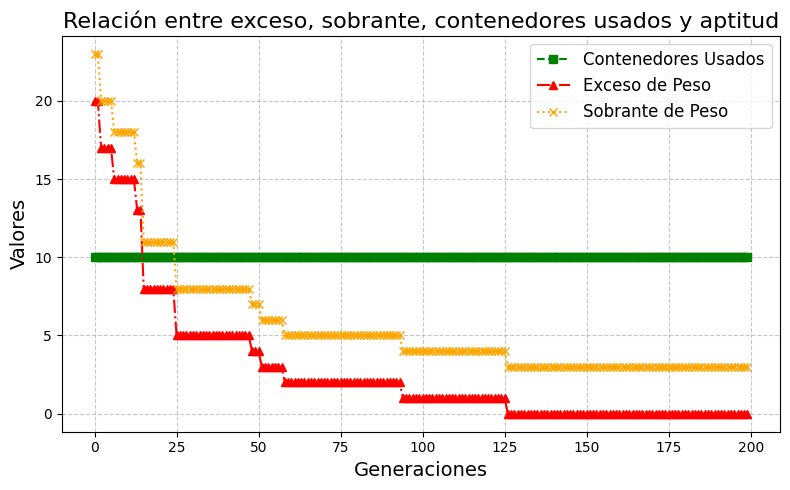

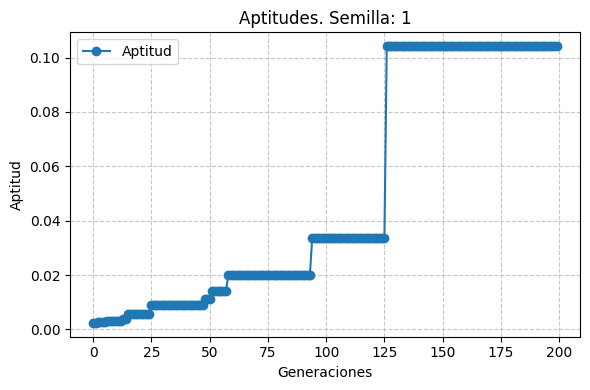



---SEMILLA [3]-----



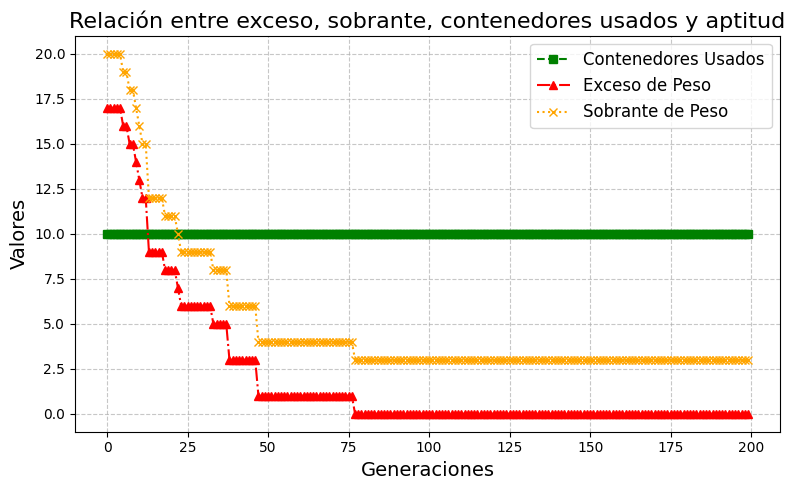

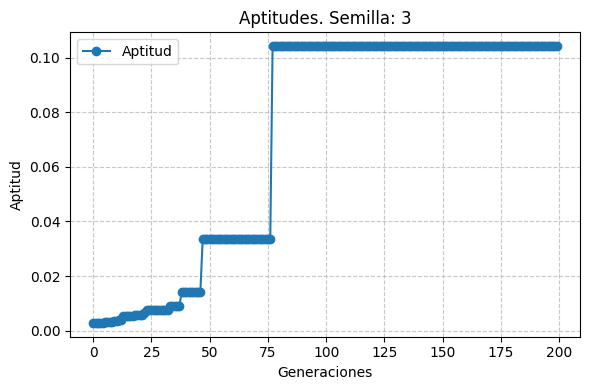



---SEMILLA [5]-----



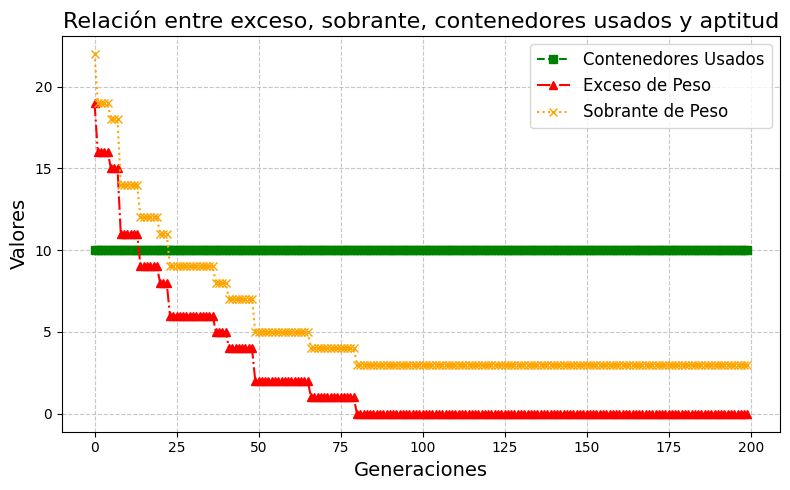

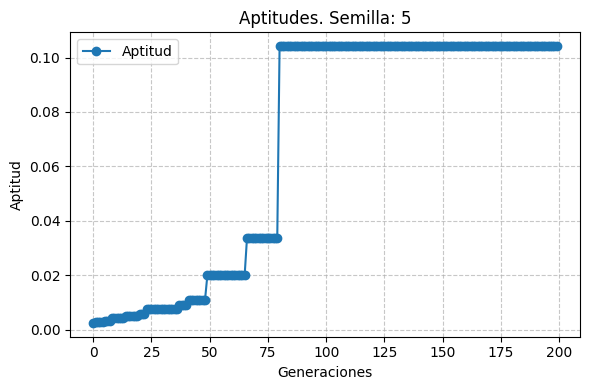



---SEMILLA [7]-----



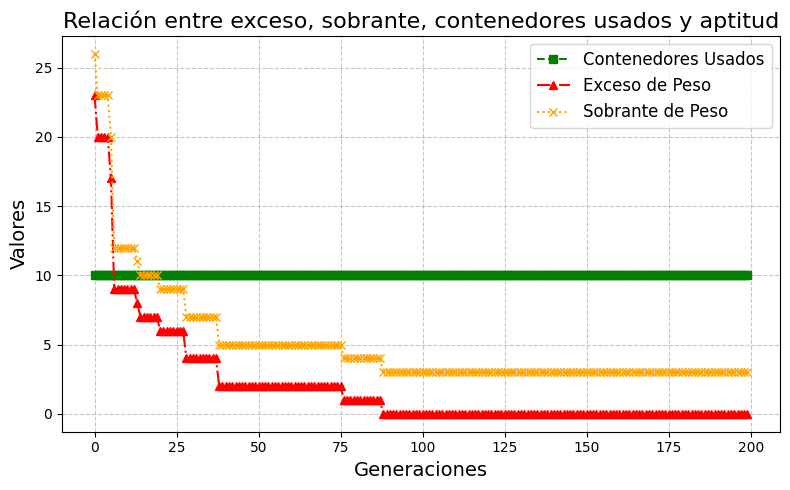

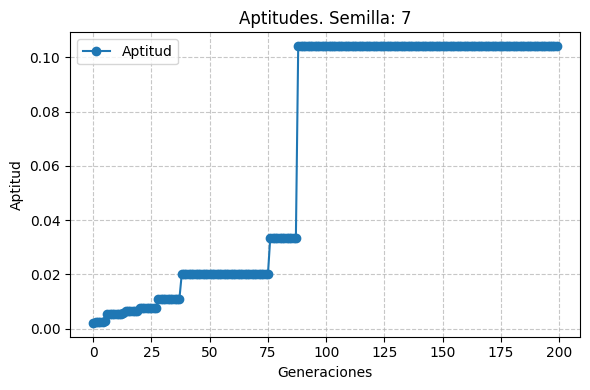



---SEMILLA [11]-----



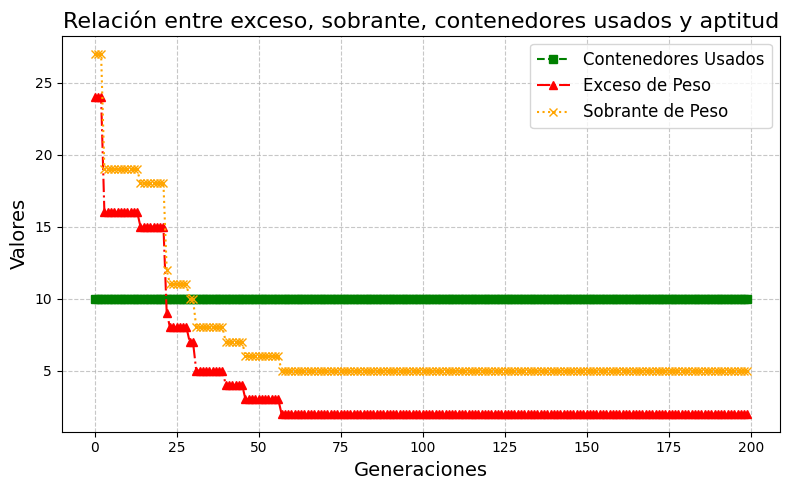

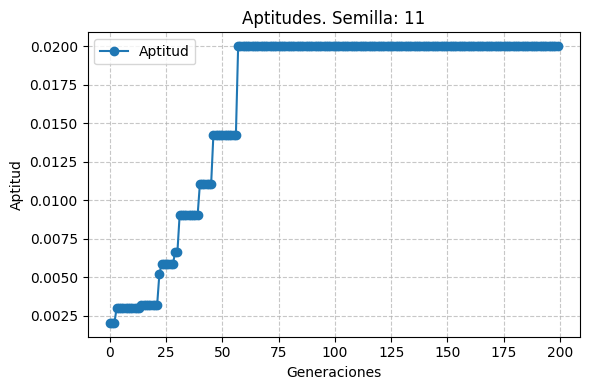

In [ ]:
pesos = [
    12, 11, 10, 9, 8, 8, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
]
capacidad = 20

for semilla in semillas:
  print(f"\n\n---SEMILLA [{semilla}]-----\n")
  random.seed(semilla)

  AG = AG_BPP(pesos, capacidad, alpha=0.8, beta = 20, gamma=0.2)
  resultados_algoritmo = AG.run(20, 200, 0.6, 0.5, False)

  aptitudes = [elem['mejor_aptitud'] for elem in resultados_algoritmo]
  contenedores = [len(np.unique(elem['mejor_individuo'])) for elem in resultados_algoritmo]

  graficar_relaciones(resultados_algoritmo)
  graficar_aptitudes(aptitudes, f"Aptitudes. Semilla: {semilla}")

  df = pd.DataFrame(resultados_algoritmo)
  df.head()
  # Guardar el DataFrame en un archivo CSV
  df.to_csv(f'pruebas_semilla_{semilla}.csv', index=False)  # index=False para no guardar el índice
